# Principal Component Analysis with Cancer Data

In [57]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [58]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [95]:
#colnames = ['IDNum', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
df_cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')
df_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [92]:
df_cancer.shape
df_cancer.info()
df_cancer.describe().T


(699, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [93]:
df_cancer['Bare Nuclei'].unique()
df_cancer['Bare Nuclei'].value_counts()
pd.crosstab(df_cancer['Bare Nuclei'], df_cancer['Class'] )

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Class,2,4
Bare Nuclei,,
1,387,15
10,3,129
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,19


In [96]:
#Need to impute '?' in BAre Nuclei
# Replace question mark with 1 (highest occuring value)
# for class = 2, highest occurance is 1, for class = 4, highest occurance is 10

#df_cancer['Bare Nuclei'].replace ('?', '1')
#df_cancer['Bare Nuclei'] = df_cancer['Bare Nuclei'].replace ('?', '1')



df_cancer["Bare Nuclei"] = np.where (((df_cancer['Bare Nuclei'] == '?') & (df_cancer['Class'] == 2)), '1', df_cancer['Bare Nuclei'])
df_cancer["Bare Nuclei"] = np.where (((df_cancer['Bare Nuclei'] == '?') & (df_cancer['Class'] == 4)), '10', df_cancer['Bare Nuclei'])


df_cancer['Bare Nuclei'].unique()
df_cancer['Bare Nuclei'].value_counts()


array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

1     416
10    134
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [ ]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [105]:
corrmat = df_cancer.corr()
top_corr_features = corrmat.index
corrmat

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<Figure size 1440x1440 with 0 Axes>

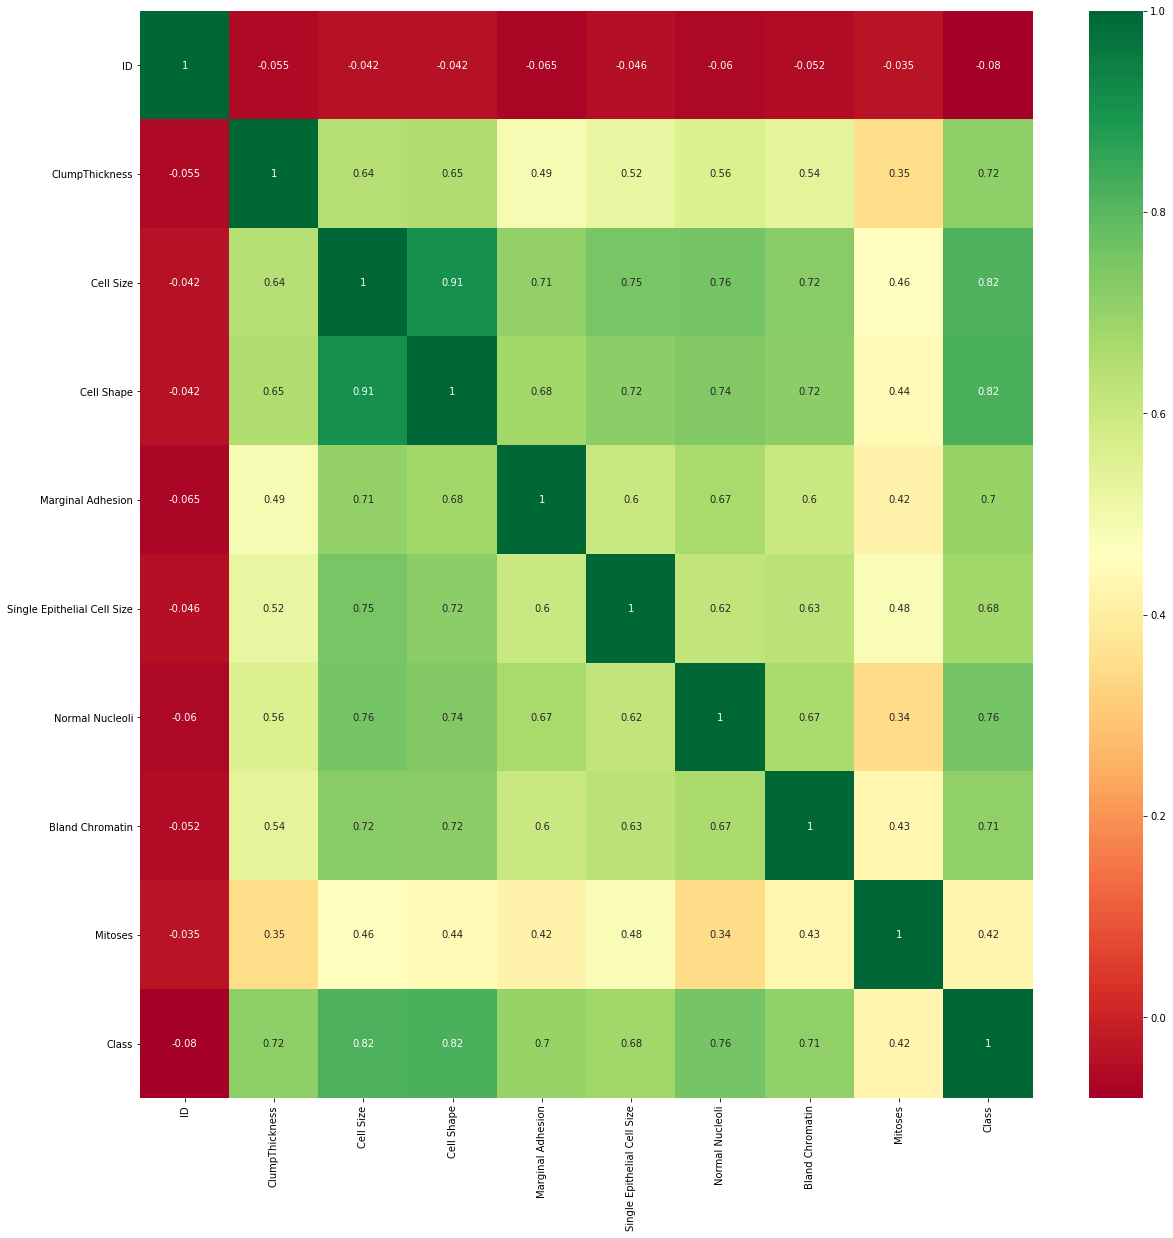

In [106]:

plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cancer[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

## Cell size is highly correlated to Cell Shape and other values.


In [ ]:
#Let us check for pair plots

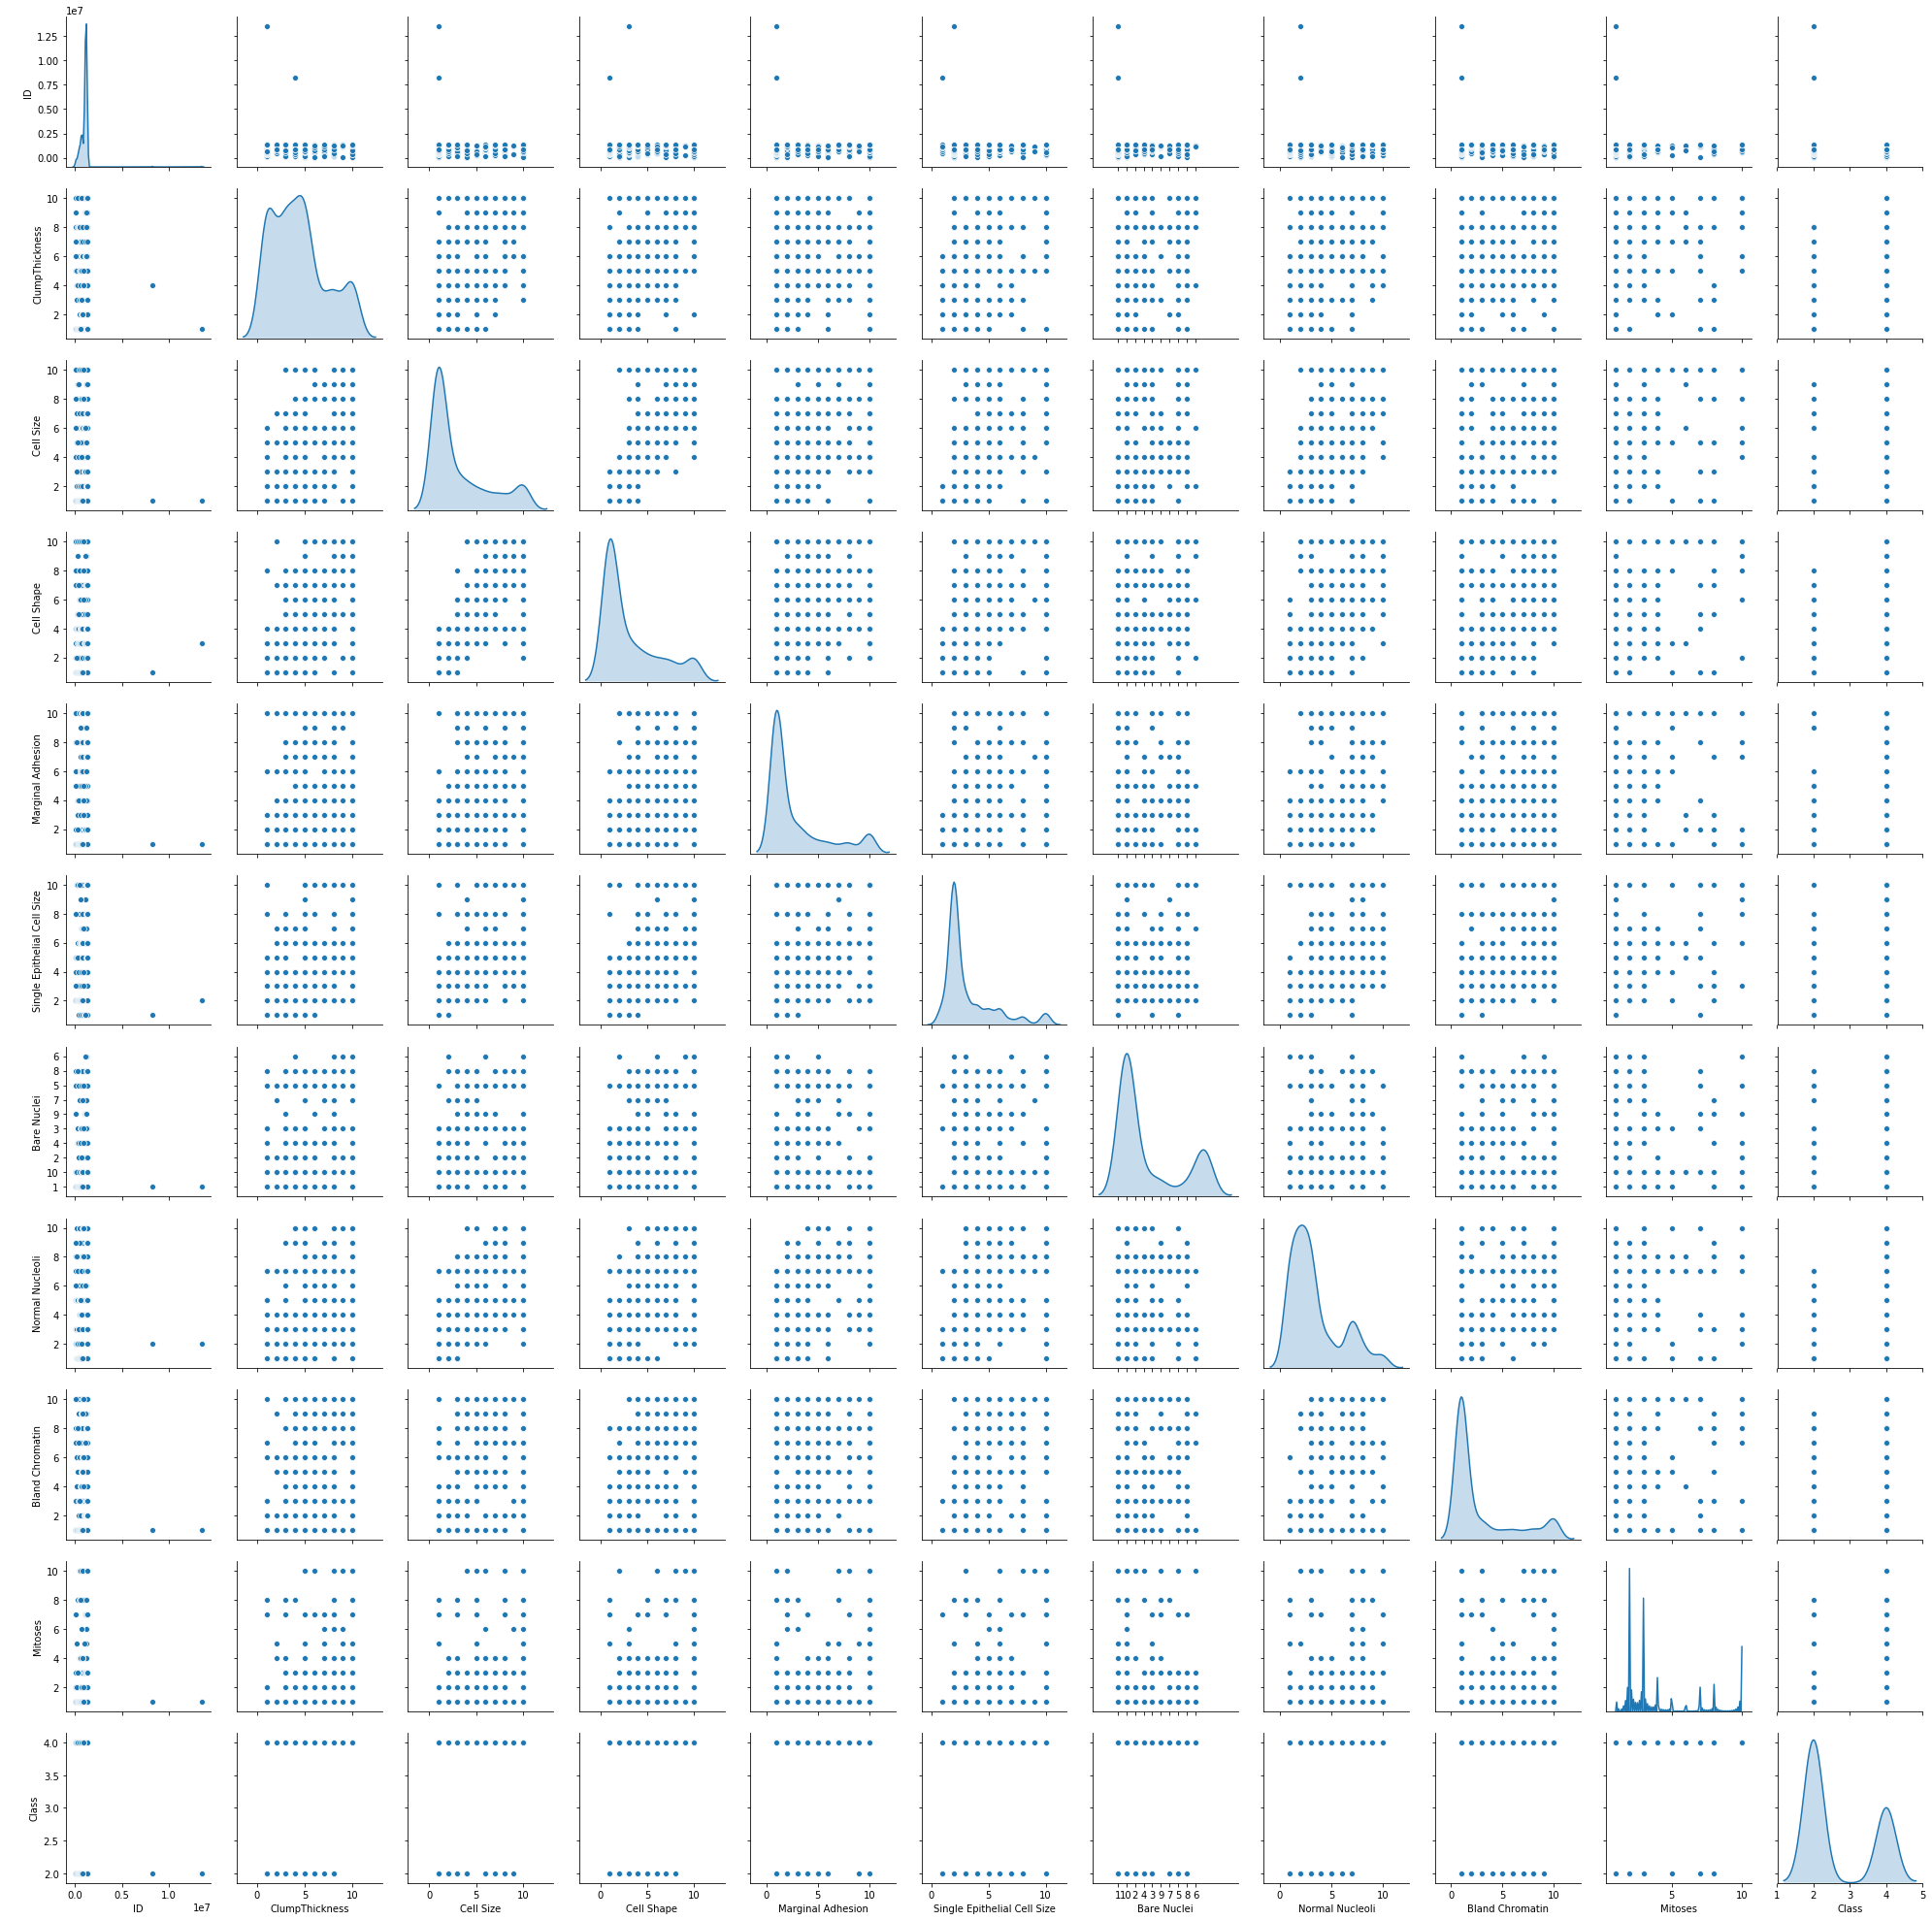

In [107]:
sns.pairplot(df_cancer, diag_kind = 'kde')

In [122]:
df_cancer['Cell Shape'].value_counts()

1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Cell Shape, dtype: int64

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [124]:
df = df_cancer.drop(['ID'], axis=1)
X = df.drop(['Class'], axis=1)
y = df_cancer['Class']

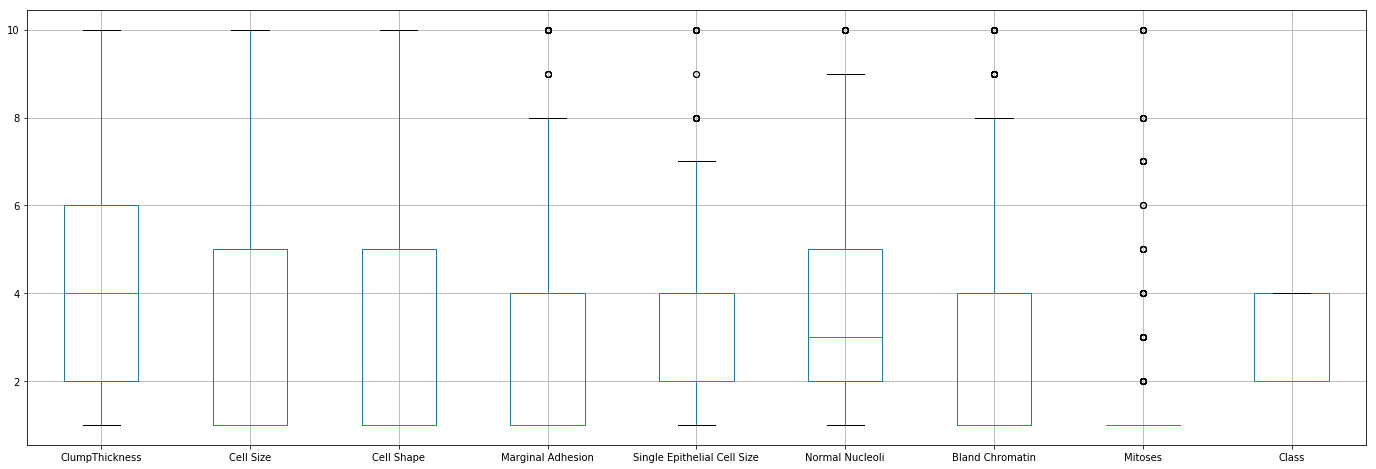

In [111]:
# Check outliers for the model
df.boxplot(figsize=(24,8))

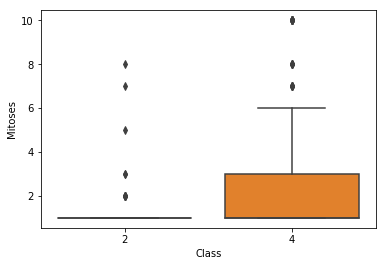

In [112]:
sns.boxplot(x='Class', y='Mitoses', data=df)

Mitoses has several outliers

In [114]:
df['Mitoses'].unique()
df['Mitoses'].value_counts()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64)

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

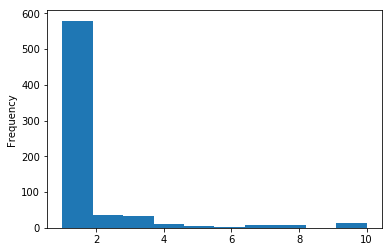

In [120]:
df['Mitoses'].plot.hist()

### I am not dropping any columns or removing outliers

# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
cov_matrix = np.cov(X_std.T)
print (cov_matrix)

[[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.597579
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.69163739
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.71358576
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66082075
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.57835185
  0.61698451 0.62978166 0.47978787]
 [0.597579   0.69163739 0.71358576 0.66082075 0.57835185 1.00143266
  0.68146015 0.58180093 0.33910618]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.68146015
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.58180093
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.33910618
  0.34466258 0.42894941 1.00143266]]


C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [128]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print ('eigenvectors', eigenvectors)
print ('eigenvalues', eigenvalues)


eigenvectors [[-0.30307228 -0.1498126   0.85819758  0.00095415  0.05185935 -0.05160515
   0.22832758 -0.30062862 -0.03654917]
 [-0.38122483 -0.04723919 -0.03064666  0.73488729 -0.20171528  0.13763993
  -0.45562313 -0.05715847 -0.20234675]
 [-0.37768305 -0.08405724  0.02469768 -0.66650008 -0.17513104  0.1013523
  -0.59169167  0.00859077 -0.11975624]
 [-0.33221905 -0.03743766 -0.41065988 -0.04458532  0.49222128  0.03534932
   0.0886491  -0.68008513  0.06077598]
 [-0.33582928  0.17047291 -0.12293869 -0.06573043 -0.41703564  0.64727778
   0.45498234  0.04153993  0.19261758]
 [-0.33412743 -0.259323    0.04223777  0.0736593   0.51659195  0.1050904
  -0.05235403  0.56142079  0.46696384]
 [-0.34616024 -0.22836703 -0.20294221 -0.06004569  0.0435553  -0.23631851
   0.40148158  0.31894327 -0.68012851]
 [-0.33603131  0.02553781 -0.14899783  0.01797199 -0.42139775 -0.68259862
   0.09909044 -0.03513224  0.45753394]
 [-0.229422    0.90429217  0.11411541 -0.00740857  0.251813   -0.12276183
  -0.039498

In [132]:
eig_pairs = [(eigenvalues[index], eigenvectors[:, index]) for index in range (len(eigenvalues))]

In [134]:
eig_pairs.sort()
eig_pairs.reverse()
print (eig_pairs)

[(5.901506558236862, array([-0.30307228, -0.38122483, -0.37768305, -0.33221905, -0.33582928,
       -0.33412743, -0.34616024, -0.33603131, -0.229422  ])), (0.7794685872553015, array([-0.1498126 , -0.04723919, -0.08405724, -0.03743766,  0.17047291,
       -0.259323  , -0.22836703,  0.02553781,  0.90429217])), (0.5399295320340332, array([ 0.85819758, -0.03064666,  0.02469768, -0.41065988, -0.12293869,
        0.04223777, -0.20294221, -0.14899783,  0.11411541])), (0.4603573601699989, array([ 0.05185935, -0.20171528, -0.17513104,  0.49222128, -0.41703564,
        0.51659195,  0.0435553 , -0.42139775,  0.251813  ])), (0.37900409344553626, array([-0.05160515,  0.13763993,  0.1013523 ,  0.03534932,  0.64727778,
        0.1050904 , -0.23631851, -0.68259862, -0.12276183])), (0.3083279535339602, array([-0.30062862, -0.05715847,  0.00859077, -0.68008513,  0.04153993,
        0.56142079,  0.31894327, -0.03513224,  0.15455676])), (0.292468891189172, array([-0.03654917, -0.20234675, -0.11975624,  0.

In [135]:
eigenvalues_sorted = [eig_pairs[index][0] for index in range (len(eigenvalues))]

In [136]:
eigenvectors_sorted = [eig_pairs[index][1] for index in range (len(eigenvalues))]

In [137]:
print (eigenvalues_sorted)

[5.901506558236862, 0.7794685872553015, 0.5399295320340332, 0.4603573601699989, 0.37900409344553626, 0.3083279535339602, 0.292468891189172, 0.2628751561077336, 0.08895585083543076]


# Q8 Find variance and cumulative variance by each eigen vector

In [140]:
tot = sum(eigenvalues)
print (tot)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9 th entry 
# cumulative reaching almost 100%


9.012893982808029


In [142]:
cum_var_exp

array([0.65478486, 0.74126858, 0.80117493, 0.85225257, 0.89430389,
       0.92851354, 0.96096359, 0.99013016, 1.        ])

<BarContainer object of 9 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal components')

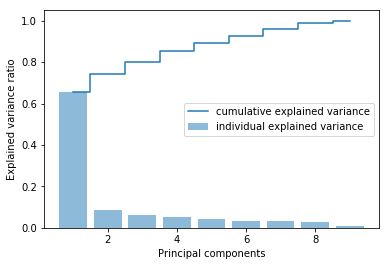

In [141]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [144]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigenvectors_sorted[0:7])   # Reducing from 9 to 7 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=7)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [147]:
X_pca = pca.transform(X)

In [148]:
pca.components_

array([[ 0.29840918,  0.40393589,  0.3919499 ,  0.33018051,  0.24899624,
         0.44224222,  0.29207201,  0.35649312,  0.12317934],
       [-0.12294234,  0.22425464,  0.15486611, -0.04377034,  0.20639092,
        -0.780988  ,  0.0105023 ,  0.47357727,  0.17824276],
       [-0.836266  , -0.04093058, -0.08505241,  0.50116827,  0.02874465,
         0.13856451,  0.11523056,  0.08374387,  0.01621169],
       [ 0.10739686,  0.25531654,  0.17050889,  0.43154512,  0.19159719,
        -0.2977141 , -0.05325335, -0.74369555,  0.16344034],
       [-0.41097394,  0.36664609,  0.39570896, -0.60814864,  0.20218705,
         0.13899295,  0.07732876, -0.24963373, -0.20431673],
       [-0.08851842, -0.1004577 , -0.09686691, -0.18210563,  0.39333242,
         0.24677235, -0.4651462 ,  0.01722727,  0.71222352],
       [-0.02901084,  0.17569834,  0.34251082,  0.19245131, -0.28795242,
         0.05460426, -0.79669697,  0.14869353, -0.26683936]])

In [149]:
X_pca.shape

(699, 7)

In [150]:
pca.explained_variance_

array([48.67393672,  5.13641823,  4.2667089 ,  3.14617742,  2.7476626 ,
        2.41636778,  1.77657411])

In [151]:
pca.explained_variance_ratio_

array([0.68980648, 0.07279326, 0.06046775, 0.04458759, 0.03893984,
       0.03424474, 0.02517759])

# Q10 Find correlation between components and features

In [155]:
X.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [157]:
pd.DataFrame(pca.components_,columns=X.columns)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.298409,0.403936,0.391950,0.330181,0.248996,0.442242,0.292072,0.356493,0.123179
1,-0.122942,0.224255,0.154866,-0.043770,0.206391,-0.780988,0.010502,0.473577,0.178243
2,-0.836266,-0.040931,-0.085052,0.501168,0.028745,0.138565,0.115231,0.083744,0.016212
3,0.107397,0.255317,0.170509,0.431545,0.191597,-0.297714,-0.053253,-0.743696,0.163440
4,-0.410974,0.366646,0.395709,-0.608149,0.202187,0.138993,0.077329,-0.249634,-0.204317
5,-0.088518,-0.100458,-0.096867,-0.182106,0.393332,0.246772,-0.465146,0.017227,0.712224
6,-0.029011,0.175698,0.342511,0.192451,-0.287952,0.054604,-0.796697,0.148694,-0.266839


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [158]:
df_jokes = pd.read_csv('jokes.csv')
df_jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [168]:
ratings = df_jokes.iloc[:200, 1:]
df_jokes.shape
ratings.shape
ratings.head()


(24983, 101)

(200, 100)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [176]:
ratings.columns = range(0,100)
ratings.shape
ratings.columns
ratings.head()

(200, 100)

RangeIndex(start=0, stop=100, step=1)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [174]:
ratings.replace(99.00, 0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)
ratings_diff.shape
ratings_diff
ratings_diff_df = pd.DataFrame(data=ratings_diff)
ratings_diff_df

(200, 100)

array([[-0.83401707, -0.26302556, -0.9426833 , ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.5697436 , -0.49904647, -0.60368031, ..., -1.40370926,
        -1.3580697 , -1.41633091],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       ...,
       [-0.60216707, -0.5900237 , -0.76302442, ..., -1.42660908,
        -1.25310717, -1.42999758],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.53643182, -0.68074099, -0.834761  , ...,  0.70778183,
         0.7894014 ,  0.70807651]])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,-0.593006,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,-0.207319,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,2.269575,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,-0.410922,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,-0.303603,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834
5,-0.797374,-0.583525,-0.728955,-1.072902,-1.301062,-0.790424,-1.578608,-0.161811,-0.984348,-0.511344,...,-1.536632,-1.501198,-1.369490,-1.386409,-1.426499,-1.441815,-1.274105,-1.605313,-1.373243,-1.514384
6,1.538226,2.081847,1.356697,1.069553,1.591786,-0.914110,1.344707,1.830154,1.171165,2.269575,...,0.700489,0.740224,0.773171,0.772626,0.740124,-1.320709,0.806302,0.707782,0.789401,0.708077
7,-0.508450,-0.409369,-0.544217,-1.027262,-1.498469,-0.731825,1.620828,0.308342,-0.954561,-0.583626,...,-1.301662,-1.379062,-1.357023,-1.444006,-1.447485,-1.441815,-1.230163,-1.412056,-1.241052,-1.439543
8,-0.744519,-0.583525,-0.937605,-1.040815,-1.605475,-0.700288,-0.972924,-1.823844,-1.009035,-0.505827,...,-1.364059,-1.361493,-1.265238,-1.329871,-1.386028,-1.376571,-1.281253,-1.417192,-1.338948,-1.546924
9,-0.593506,-0.357642,-0.629285,-0.843509,1.189591,-0.578616,1.560259,0.537233,-0.787261,-0.236563,...,0.700489,-1.260736,0.773171,0.772626,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [187]:
ratings_mean = ratings_diff_df.mean(axis=0)
ratings_mean

0    -4.940492e-17
1    -6.217249e-17
2    -6.106227e-17
3     2.536860e-16
4    -8.881784e-18
5    -8.881784e-18
6    -1.665335e-18
7     2.331468e-17
8    -9.492407e-17
9     9.992007e-18
10   -2.386980e-17
11    1.126876e-16
12    6.661338e-17
13   -1.221245e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20   -4.718448e-18
21    9.020562e-17
22    3.275158e-17
23   -5.606626e-17
24    4.996004e-18
25    2.983724e-17
26   -5.440093e-17
27   -1.672273e-17
28   -2.775558e-18
29    1.054712e-17
          ...     
70    1.743050e-16
71    1.443290e-17
72    2.153833e-16
73   -6.772360e-17
74    2.997602e-17
75    4.996004e-17
76   -3.030909e-16
77    7.327472e-17
78    7.771561e-18
79   -2.886580e-16
80    3.885781e-17
81   -1.598721e-16
82   -6.328271e-17
83    1.665335e-16
84    2.642331e-16
85    2.886580e-17
86   -3.441691e-17
87    2.831069e-16
88   -2.220446e-17
89   -3.974598e-16
90    1.004752e-16
91   -3.2085

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [189]:
ratings_mean.sort_values(ascending=False).head(10)

87    2.831069e-16
84    2.642331e-16
3     2.536860e-16
95    2.342571e-16
72    2.153833e-16
70    1.743050e-16
93    1.676437e-16
83    1.665335e-16
96    1.476597e-16
63    1.426637e-16
dtype: float64

#### These 10 jokes are really nice and funny jokes !! Enjoy them!!!